## DECISÕES DO SUPREMO TRIBUNAL FEDERAL EM MATÉRIA TRIBUTÁRIA – UMA ANÁLISE A PARTIR DA CLUSTERIZAÇÃO 

### Coleta de Dados

In [1]:
# Importar bibliotecas que serão utilizadas no curso do projeto

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from kneed import KneeLocator
from wordcloud import WordCloud
%matplotlib inline

stopwords = nltk.corpus.stopwords.words('portuguese')

In [2]:
# Lendo o primeiro Dataset

STF_df = pd.read_excel("jurisprudencia_STF.xls") 
display(STF_df)

Palavra Chave  Processo  NI                          Autoridade  \
0        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
1        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
2        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
3        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
4        tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
5        tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
6        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
7        tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
8        tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
9        tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
10       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
11       tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
12       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
13       tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
14       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
15       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
16       tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
17       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
18       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
19       tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
20       tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
21       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
22       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
23       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
24       tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
25       tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
26       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
27       tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
28       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
29       tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
...             ...       ...  ..                                 ...   
11141    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11142    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11143    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11144    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11145    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11146    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11147    tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
11148    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11149    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11150    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11151    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11152    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11153    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11154    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11155    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11156    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11157    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11158    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11159    tributario       NaN NaN  Supremo Tribunal Federal. 1ª Turma   
11160    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11161    tributario       NaN NaN  Supremo Tribunal Federal. 2ª Turma   
11162    tributario       NaN NaN  Supremo Tribunal Federal. Plenário   
11163    tributario       NaN NaN  Supremo Tribunal Federal. 1ª 

In [3]:
STF_df.shape

(11171, 7)

In [4]:
STF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 7 columns):
Palavra Chave    11171 non-null object
Processo         0 non-null float64
NI               0 non-null float64
Autoridade       11171 non-null object
Título           11171 non-null object
Data             11171 non-null datetime64[ns]
Ementa           11171 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 611.0+ KB


In [5]:
# Coleta de Dados do Segundo Dataset

url = 'https://pt.wikipedia.org/wiki/Lista_de_presidentes_do_Supremo_Tribunal_Federal'
table_class = 'wikitable sortable'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

tabela_STF = soup.find_all('table', {'class' : table_class})
 
coleta_tabela = pd.read_html(str(tabela_STF[1]))
Presidentes_STF = pd.concat(coleta_tabela)

In [6]:
Presidentes_STF

Ministro(Nascimento–Falecimento)  Ministro(Nascimento–Falecimento).1  \
0                                 1                                 NaN   
1                                 2                                 NaN   
2                                 2                                 NaN   
3                                 3                                 NaN   
4                                 4                                 NaN   
5                                 5                                 NaN   
6                                 5                                 NaN   
7                                 5                                 NaN   
8                                 6                                 NaN   
9                                 7                                 NaN   
10                                7                                 NaN   
11                                8                                 NaN   
12                                9                                 NaN   
13                                9                                 NaN   
14                               10                                 NaN   
15                               11                                 NaN   
16                               12                                 NaN   
17                               13                                 NaN   
18                               14                                 NaN   
19                               15                                 NaN   
20                               15                                 NaN   
21                               16                                 NaN   
22                               16                                 NaN   
23                               17                                 NaN   
24                               17                                 NaN   
25                               18                                 NaN   
26                               18                                 NaN   
27                               19                                 NaN   
28                               20                                 NaN   
29                               20                                 NaN   
..                              ...                                 ...   
35                               25                                 NaN   
36                               25                                 NaN   
37                               26                                 NaN   
38                               27                                 NaN   
39                               27                                 NaN   
40                               28                                 NaN   
41                               29                                 NaN   
42                               29                                 NaN   
43                               30                                 NaN   
44                               31                                 NaN   
45                               32                                 NaN   
46                               33                                 NaN   
47                               34                                 NaN   
48                               34                                 NaN   
49                               35                                 NaN   
50                               36                                 NaN   
51                               37                                 NaN   
52                               38                                 NaN   
53                               38                                 NaN   
54                               39                                 NaN   
55                               40                                 NaN   
56                          

In [7]:
Presidentes_STF.shape

(65, 8)

In [8]:
Presidentes_STF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
Ministro(Nascimento–Falecimento)      65 non-null object
Ministro(Nascimento–Falecimento).1    0 non-null float64
Ministro(Nascimento–Falecimento).2    65 non-null object
Período                               65 non-null object
Duração                               65 non-null object
Indicação presidencial                65 non-null object
Vice-presidente                       65 non-null object
Cargo anterior à indicação            65 non-null object
dtypes: float64(1), object(7)
memory usage: 4.1+ KB


## Pré-processamento de texto

In [9]:
Presidentes_STF = Presidentes_STF.drop(columns=['Ministro(Nascimento–Falecimento)', 'Ministro(Nascimento–Falecimento).1',
                                                'Duração', 'Indicação presidencial', 'Vice-presidente',
                                                'Cargo anterior à indicação'])
display(Presidentes_STF)

Ministro(Nascimento–Falecimento).2  \
0             Freitas Henriques(1822–1903)[20][21]   
1               Aquino e Castro(1828–1906)[22][23]   
2               Aquino e Castro(1828–1906)[22][23]   
3                Piza e Almeida(1842–1908)[24][25]   
4             Pindaíba de Matos(1831–1913)[26][27]   
5    Hermínio do Espírito Santo(1841–1924)[28][29]   
6    Hermínio do Espírito Santo(1841–1924)[28][29]   
7    Hermínio do Espírito Santo(1841–1924)[28][29]   
8              André Cavalcanti(1834–1927)[30][31]   
9               Godofredo Cunha(1860–1936)[32][33]   
10              Godofredo Cunha(1860–1936)[32][33]   
11                  Leoni Ramos(1857–1931)[34][35]   
12                 Edmundo Lins(1863–1944)[36][37]   
13                 Edmundo Lins(1863–1944)[36][37]   
14               Bento de Faria(1876–1959)[38][39]   
15             Eduardo Espínola(1875–1968)[40][41]   
16            José Linhares(1886–1957)[42][43][44]   
17             Laudo de Camargo(1881–1963)[45][46]   
18            José Linhares(1886–1957)[47][48][44]   
19          Orozimbo Nonato(1891–1974)[49][50][51]   
20          Orozimbo Nonato(1891–1974)[49][50][51]   
21               Barros Barreto(1895–1969)[52][53]   
22               Barros Barreto(1895–1969)[52][53]   
23         Lafayette de Andrada(1900–1974)[54][55]   
24         Lafayette de Andrada(1900–1974)[54][55]   
25             Ribeiro da Costa(1897–1967)[56][57]   
26             Ribeiro da Costa(1897–1967)[56][57]   
27                Luís Gallotti(1904–1978)[58][59]   
28        Gonçalves de Oliveira(1910–1992)[60][61]   
29        Gonçalves de Oliveira(1910–1992)[60][61]   
..                                             ...   
35          Thompson Flores(1911–2001)[70][71][72]   
36          Thompson Flores(1911–2001)[70][71][72]   
37                Antônio Neder(1911–2003)[73][74]   
38    Xavier de Albuquerque(1926–2015)[75][76][77]   
39    Xavier de Albuquerque(1926–2015)[75][76][77]   
40          Cordeiro Guerra(1916–1993)[78][79][80]   
41                Moreira Alves(1933–)[81][82][83]   
42                Moreira Alves(1933–)[81][82][83]   
43                 Rafael Mayer(1919–2013)[84][85]   
44             Néri da Silveira(1932–)[86][87][88]   
45         Aldir Passarinho(1921–2014)[89][90][91]   
46               Sydney Sanches(1933–)[92][93][94]   
47             Octavio Gallotti(1930–)[95][96][97]   
48             Octavio Gallotti(1930–)[95][96][97]   
49          Sepúlveda Pertence(1937–)[98][99][100]   
50            Celso de Mello(1945–)[101][102][103]   
51            Carlos Velloso(1936–)[104][105][106]   
52             Marco Aurélio(1946–)[107][108][109]   
53             Marco Aurélio(1946–)[107][108][109]   
54            Maurício Corrêa(1934–2012)[110][111]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
57             Gilmar Mendes(1955–)[119][120][121]   
58         Cezar Peluso(1942–)[122][123][124][125]   
59         Ayres Britto(1942–)[126][127][128][129]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   
62         Cármen Lúcia(1954–)[138][139][140][141]   
63                   Dias Toffoli(1967–)[142][143]   
64                         Luiz Fux(1953–)[8][144]   

                                              Período  
0      28 de fevereiro de 1891–9 de fevereiro de 1894  
1        28 de fevereiro de 1894–10 de agosto de 1906  
2        28 de fevereiro de 1894–10 de agosto de 1906  
3            18 de agosto de 1906–22 de abril de 1908  
4          29 de abril de 1908–26 de dezembro de 1910  
5         4 de janeiro de 1911–11 de novembro de 1924  
6         4 de janeiro de 1911–11 de novembro de 1924  
7         4 de janeiro de 1911–11 de novembro de 1924  
8      14 de novembro de 1924–13 de fevereiro de 1927  
9     22 de fevereiro de 1927–17 de fevereiro de 1931  
10    22 de fevereiro de 1927–17 de fevereiro de 19

In [10]:
# Remover registros duplicados

Presidentes_STF = Presidentes_STF.drop_duplicates()
Presidentes_STF.head()

Ministro(Nascimento–Falecimento).2  \
0           Freitas Henriques(1822–1903)[20][21]   
1             Aquino e Castro(1828–1906)[22][23]   
3              Piza e Almeida(1842–1908)[24][25]   
4           Pindaíba de Matos(1831–1913)[26][27]   
5  Hermínio do Espírito Santo(1841–1924)[28][29]   

                                          Período  
0  28 de fevereiro de 1891–9 de fevereiro de 1894  
1    28 de fevereiro de 1894–10 de agosto de 1906  
3        18 de agosto de 1906–22 de abril de 1908  
4      29 de abril de 1908–26 de dezembro de 1910  
5     4 de janeiro de 1911–11 de novembro de 1924

In [11]:
Presidentes_STF.shape

(50, 2)

In [12]:
# Remover acentos da coluna 'Nome', alocando em nova coluna

def retira_acento_a(texto):
    res = re.sub(r'[áàâã]','a', texto, flags=re.I)
    return res

def retira_acento_e(texto):
    res = re.sub(r'[éê]','e', texto, flags=re.I)
    return res

def retira_acento_i(texto):
    res = re.sub(r'í','i', texto, flags=re.I)
    return res

def retira_acento_o(texto):
    res = re.sub(r'[óõô]','o', texto, flags=re.I)
    return res

def retira_acento_u(texto):
    res = re.sub(r'[úü]','u', texto, flags=re.I)
    return res

Presidentes_STF['coluna_provisoria1'] = Presidentes_STF['Ministro(Nascimento–Falecimento).2'].apply(retira_acento_a)
Presidentes_STF['coluna_provisoria2'] = Presidentes_STF['coluna_provisoria1'].apply(retira_acento_e)
Presidentes_STF['coluna_provisoria3'] = Presidentes_STF['coluna_provisoria2'].apply(retira_acento_i)
Presidentes_STF['coluna_provisoria4'] = Presidentes_STF['coluna_provisoria3'].apply(retira_acento_o)
Presidentes_STF['Nome_formatado'] = Presidentes_STF['coluna_provisoria4'].apply(retira_acento_u)

In [13]:
# Remover pontuação e outros caracteres diferentes de letras ou espaço

def apenas_letras_espaco(texto):
    res = re.sub(r'[^A-Z ]+', '', texto, flags=re.I)
    return res

Presidentes_STF['Presidente'] = Presidentes_STF['Nome_formatado'].apply(apenas_letras_espaco)

In [14]:
Presidentes_STF[Presidentes_STF['Período'].str.contains('nota')]

Ministro(Nascimento–Falecimento).2  \
46               Sydney Sanches(1933–)[92][93][94]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   

                                              Período  \
46  No exercício da presidênciadesde 22 de abril d...   
55  No exercício da presidênciadesde 8 de agosto d...   
56  No exercício da presidênciadesde 29 de março d...   
60  No exercício da presidênciadesde 18 de novembr...   
61  No exercício da presidênciadesde 31 de julho d...   

                                coluna_provisoria1  \
46               Sydney Sanches(1933–)[92][93][94]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   

                                coluna_provisoria2  \
46               Sydney Sanches(1933–)[92][93][94]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   

                                coluna_provisoria3  \
46               Sydney Sanches(1933–)[92][93][94]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   

                                coluna_provisoria4  \
46               Sydney Sanches(1933–)[92][93][94]   
55              Nelson Jobim(1946–)[112][113][114]   
56              Ellen Gracie(1948–)[115][116][117]   
60      Joaquim Barbosa(1954–)[130][131][132][133]   
61  Ricardo Lewandowski(1948–)[134][135][136][137]   

                                    Nome_formatado           Presidente  
46               Sydney Sanches(1933–)[92][93][94]       Sydney Sanches  
55              Nelson Jobim(1946–)[112][113][114]         Nelson Jobim  
56              Ellen Gracie(1948–)[115][116][117]         Ellen Gracie  
60      Joaquim Barbosa(1954–)[130][131][132][133]      Joaquim Barbosa  
61  Ricardo Lewandowski(1948–)[134][135][136][137]  Ricardo Lewandowski

In [15]:
print(Presidentes_STF.loc[30,'Período'])
print(Presidentes_STF.loc[46,'Período'])
print(Presidentes_STF.loc[55,'Período'])
print(Presidentes_STF.loc[56,'Período'])
print(Presidentes_STF.loc[60,'Período'])
print(Presidentes_STF.loc[61,'Período'])
print(Presidentes_STF.loc[64,'Período'])

18 de janeiro 1969–10 de fevereiro de 1969
No exercício da presidênciadesde 22 de abril de 1991[nota 22]10 de maio de 1991–13 de maio de 1993
No exercício da presidênciadesde 8 de agosto de 2004[nota 25]20 de agosto de 2004–29 de março de 2006
No exercício da presidênciadesde 29 de março de 2006[nota 26]27 de abril de 2006–23 de abril de 2008
No exercício da presidênciadesde 18 de novembro de 2012[nota 27]22 de novembro de 2012–31 de julho de 2014
No exercício da presidênciadesde 31 de julho de 2014[nota 28]10 de setembro de 2014–12 de setembro de 2016
10 de setembro de 2020–em exercício


In [16]:
Presidentes_STF.loc[30, 'Período'] = "18 de janeiro de 1969–10 de fevereiro de 1969"
Presidentes_STF.loc[46, 'Período'] = "22 de abril de 1991–13 de maio de 1993"
Presidentes_STF.loc[55, 'Período'] = "8 de agosto de 2004–29 de março de 2006"
Presidentes_STF.loc[56, 'Período'] = "29 de março de 2006–23 de abril de 2008"
Presidentes_STF.loc[60, 'Período'] = "18 de novembro de 2012–31 de julho de 2014"
Presidentes_STF.loc[61, 'Período'] = "31 de julho de 2014–12 de setembro de 2016"
Presidentes_STF.loc[64, 'Período'] = "10 de setembro de 2020–31 de dezembro de 2020"

In [17]:
print(Presidentes_STF.loc[30,'Período'])
print(Presidentes_STF.loc[46,'Período'])
print(Presidentes_STF.loc[55,'Período'])
print(Presidentes_STF.loc[56,'Período'])
print(Presidentes_STF.loc[60,'Período'])
print(Presidentes_STF.loc[61,'Período'])
print(Presidentes_STF.loc[64,'Período'])

18 de janeiro de 1969–10 de fevereiro de 1969
22 de abril de 1991–13 de maio de 1993
8 de agosto de 2004–29 de março de 2006
29 de março de 2006–23 de abril de 2008
18 de novembro de 2012–31 de julho de 2014
31 de julho de 2014–12 de setembro de 2016
10 de setembro de 2020–31 de dezembro de 2020


In [18]:
Presidentes_STF[['data_inicial', 'data_final']] = Presidentes_STF.Período.str.split('–', expand=True)

In [19]:
Presidentes_STF[['dia_data_inicial', 'conjuncao', 'mes_data_inicial', 'conjuncao2', 
                 'ano_data_inicial']] = Presidentes_STF.data_inicial.str.split(' ', expand=True)
Presidentes_STF[['dia_data_final', 'conjuncao3', 'mes_data_final', 'conjuncao4', 
                 'ano_data_final']] = Presidentes_STF.data_final.str.split(' ', expand=True)

In [20]:
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_data_inicial'].replace('janeiro', '01')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('fevereiro', '02')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('março', '03')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('abril', '04')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('maio', '05')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('junho', '06')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('julho', '07')     
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('agosto', '08')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('setembro', '09')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('outubro', '10') 
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('novembro', '11')
Presidentes_STF['mes_inicial_formatado'] = Presidentes_STF['mes_inicial_formatado'].replace('dezembro', '12')

Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_data_final'].replace('janeiro', '01')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('fevereiro', '02')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('março', '03')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('abril', '04')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('maio', '05')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('junho', '06')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('julho', '07')     
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('agosto', '08')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('setembro', '09')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('outubro', '10') 
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('novembro', '11')
Presidentes_STF['mes_final_formatado'] = Presidentes_STF['mes_final_formatado'].replace('dezembro', '12')   

In [21]:
# Remontar data em formato DD/MM/AAAA

Presidentes_STF['data_inicial_agrupada'
               ] = Presidentes_STF['dia_data_inicial'
                                  ].map(str) + "/" + Presidentes_STF['mes_inicial_formatado'
                                                                    ] + "/" + Presidentes_STF['ano_data_inicial']

Presidentes_STF['data_final_agrupada'
               ] = Presidentes_STF['dia_data_final'
                                  ].map(str) + "/" + Presidentes_STF['mes_final_formatado'
                                                                    ] + "/" + Presidentes_STF['ano_data_final']

In [22]:
# Converter data para formato Datetime

Presidentes_STF['Data Inicial'] = pd.to_datetime(Presidentes_STF['data_inicial_agrupada'], format="%d/%m/%Y")
Presidentes_STF['Data Final'] = pd.to_datetime(Presidentes_STF['data_final_agrupada'], format="%d/%m/%Y")

In [23]:
# remover colunas que já foram utilizadas

Presidentes_STF = Presidentes_STF.drop(columns=['data_inicial', 'data_final', 'dia_data_inicial', 'conjuncao', 
                                                'mes_data_inicial', 'conjuncao2', 'ano_data_inicial', 'dia_data_final', 
                                                'conjuncao3', 'mes_data_final', 'conjuncao4', 'ano_data_final', 
                                                'mes_inicial_formatado', 'mes_final_formatado', 'data_inicial_agrupada', 
                                                'data_final_agrupada', 'Ministro(Nascimento–Falecimento).2', 'Período',
                                               'coluna_provisoria1', 'coluna_provisoria2', 'coluna_provisoria3', 
                                                'coluna_provisoria4', 'Nome_formatado'])


In [24]:
Presidentes_STF.head()

Presidente Data Inicial Data Final
0           Freitas Henriques   1891-02-28 1894-02-09
1             Aquino e Castro   1894-02-28 1906-08-10
3              Piza e Almeida   1906-08-18 1908-04-22
4           Pindaiba de Matos   1908-04-29 1910-12-26
5  Herminio do Espirito Santo   1911-01-04 1924-11-11

In [25]:
Presidentes_STF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 64
Data columns (total 3 columns):
Presidente      50 non-null object
Data Inicial    50 non-null datetime64[ns]
Data Final      50 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 4.1+ KB


In [26]:
STF_df = STF_df.drop(columns=['Palavra Chave', 'Processo', 'NI'])

In [27]:
STF_df.head()

Autoridade                              Título  \
0  Supremo Tribunal Federal. Plenário             RE 599176 / PR - PARANÁ   
1  Supremo Tribunal Federal. Plenário       ADI 124 / SC - SANTA CATARINA   
2  Supremo Tribunal Federal. Plenário  RE 556664 / RS - RIO GRANDE DO SUL   
3  Supremo Tribunal Federal. Plenário  RE 560626 / RS - RIO GRANDE DO SUL   
4  Supremo Tribunal Federal. 2ª Turma           HC 85329 / SP - SÃO PAULO   

        Data                                             Ementa  
0 2014-06-05  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. IMUNIDADE ...  
1 2008-08-01  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. NORMA DO E...  
2 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...  
3 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...  
4 2006-11-21  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...

In [28]:
# Merge para incluir coluna contendo os Presidentes do STF do DataFrame Presidentes_STF no DataFrame STF_df
# através da data da decisão judicial e do período do Mandato

STF_df['Presidente_STF'] = np.dot(
        (STF_df['Data'].values[:, None] >= Presidentes_STF['Data Inicial'].values) &
        (STF_df['Data'].values[:, None] <= Presidentes_STF['Data Final'].values),
        Presidentes_STF['Presidente']
)


In [29]:
STF_df.head()

Autoridade                              Título  \
0  Supremo Tribunal Federal. Plenário             RE 599176 / PR - PARANÁ   
1  Supremo Tribunal Federal. Plenário       ADI 124 / SC - SANTA CATARINA   
2  Supremo Tribunal Federal. Plenário  RE 556664 / RS - RIO GRANDE DO SUL   
3  Supremo Tribunal Federal. Plenário  RE 560626 / RS - RIO GRANDE DO SUL   
4  Supremo Tribunal Federal. 2ª Turma           HC 85329 / SP - SÃO PAULO   

        Data                                             Ementa  \
0 2014-06-05  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. IMUNIDADE ...   
1 2008-08-01  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. NORMA DO E...   
2 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
3 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
4 2006-11-21  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

    Presidente_STF  
0  Joaquim Barbosa  
1    Gilmar Mendes  
2    Gilmar Mendes  
3    Gilmar Mendes  
4     Ellen Gracie

In [30]:
STF_df.shape

(11171, 5)

In [31]:
# Remover cedilha da coluna 'Ementa', alocando em nova coluna

def retira_cedilha(texto):
    res = re.sub(r'ç','c', str(texto), flags=re.I)
    return res

STF_df['Ementa_sem_cedilha'] = STF_df['Ementa'].apply(retira_cedilha)

In [32]:
# Remover acentos da coluna 'Ementa_sem_cedilha', alocando em nova coluna

def retira_acento_a(texto):
    res = re.sub(r'[áàâã]','a', texto, flags=re.I)
    return res

def retira_acento_e(texto):
    res = re.sub(r'[éê]','e', texto, flags=re.I)
    return res

def retira_acento_i(texto):
    res = re.sub(r'í','i', texto, flags=re.I)
    return res

def retira_acento_o(texto):
    res = re.sub(r'[óõô]','o', texto, flags=re.I)
    return res

def retira_acento_u(texto):
    res = re.sub(r'[úü]','u', texto, flags=re.I)
    return res

STF_df['coluna_provisoria1'] = STF_df['Ementa_sem_cedilha'].apply(retira_acento_a)
STF_df['coluna_provisoria2'] = STF_df['coluna_provisoria1'].apply(retira_acento_e)
STF_df['coluna_provisoria3'] = STF_df['coluna_provisoria2'].apply(retira_acento_i)
STF_df['coluna_provisoria4'] = STF_df['coluna_provisoria3'].apply(retira_acento_o)
STF_df['Ementa_sem_cedilha_acento'] = STF_df['coluna_provisoria4'].apply(retira_acento_u)

In [33]:
stopwords_especificas = ['tributario', 'sumula', 'ristf', 'recurso', 'embargos', 'declaracao', 'agravo', 'interposto',
                        'extraordinario', 'decreto', 'decretos', 'legislacao', 'constituicao', 'regimental', 'disposto',
                        'artigo', 'artigos', 'cpc', 'precedente', 'precedentes', 'direito', 'imposto', 'tributo',
                        'impostos', 'tributos', 'provimento', 'infringentes', 'supremo', 'tribunal', 'rejeitado', 'rejeitados',
                        'contradicao', 'obscuridade', 'acolhido', 'acolhidos', 'acordao', 'sentenca', 'declaratorio', 
                        'declaratorios', 'previsto', 'prevista', 'previstos', 'previstas', 'conhecido', 'embargado',
                         'ministro', 'codigo', 'codigos', 'plenario', 'processo', 'processos']


In [34]:
def remove_stopwords(texto):
    for palavra in stopwords_especificas:
        texto = texto.lower().replace(palavra, '')
    
    return(texto)

STF_df['Ementa_sem_stopwords'] = STF_df['Ementa_sem_cedilha_acento'].apply(remove_stopwords)

In [35]:
# Remover palavras de até 3 letras, alocando o resultado em uma nova coluna

def retira_curtas(texto):
    res = re.sub(r'\b[a-zA-Z]{1,3}\b','', texto) 
    return res

STF_df['Ementa_sem_curtas'] = STF_df['Ementa_sem_stopwords'].apply(retira_curtas)

In [36]:
# Remover pontuação e outros caracteres diferentes de letras ou espaço

def apenas_letras_espaco(texto):
    res = re.sub(r'[^A-Z ]+', '', texto, flags=re.I)
    return res

STF_df['Ementa_processada'] = STF_df['Ementa_sem_curtas'].apply(apenas_letras_espaco)

In [37]:
STF_df.head()

Autoridade                              Título  \
0  Supremo Tribunal Federal. Plenário             RE 599176 / PR - PARANÁ   
1  Supremo Tribunal Federal. Plenário       ADI 124 / SC - SANTA CATARINA   
2  Supremo Tribunal Federal. Plenário  RE 556664 / RS - RIO GRANDE DO SUL   
3  Supremo Tribunal Federal. Plenário  RE 560626 / RS - RIO GRANDE DO SUL   
4  Supremo Tribunal Federal. 2ª Turma           HC 85329 / SP - SÃO PAULO   

        Data                                             Ementa  \
0 2014-06-05  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. IMUNIDADE ...   
1 2008-08-01  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. NORMA DO E...   
2 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
3 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
4 2006-11-21  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

    Presidente_STF                                 Ementa_sem_cedilha  \
0  Joaquim Barbosa  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. IMUNIDADE ...   
1    Gilmar Mendes  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. NORMA DO E...   
2    Gilmar Mendes  EMENTA: PRESCRIcÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
3    Gilmar Mendes  EMENTA: PRESCRIcÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
4     Ellen Gracie  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                                  coluna_provisoria1  \
0  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. IMUNIDADE ...   
1  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. NORMA DO E...   
2  EMENTA: PRESCRIcaO E DECADÊNCIA TRIBUTaRIAS. M...   
3  EMENTA: PRESCRIcaO E DECADÊNCIA TRIBUTaRIAS. M...   
4  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                                  coluna_provisoria2  \
0  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. IMUNIDADE ...   
1  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. NORMA DO E...   
2  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
3  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
4  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                                  coluna_provisoria3  \
0  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. IMUNIDADE ...   
1  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. NORMA DO E...   
2  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
3  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
4  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                                  coluna_provisoria4  \
0  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. IMUNIDADE ...   
1  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. NORMA DO E...   
2  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
3  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
4  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                           Ementa_sem_cedilha_acento  \
0  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. IMUNIDADE ...   
1  EMENTA: CONSTITUCIONAL. TRIBUTaRIO. NORMA DO E...   
2  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
3  EMENTA: PRESCRIcaO E DECADeNCIA TRIBUTaRIAS. M...   
4  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

                                Ementa_sem_stopwords  \
0  ementa: constitucional. . imunidade tributaria...   
1  ementa: constitucional. . norma do estado de s...   
2  ementa: prescricao e decadencia tributarias. m...   
3  ementa: prescricao e decadencia tributarias. m...   
4  e m e n t a: "habeas corpus" - crimes contra a...   

                                   Ementa_sem_curtas  \
0  ementa: constitucional. . imunidade tributaria...   
1  ementa: constitucional. . norma  estado  santa...   
2  ementa: prescricao  decadencia tributarias. ma...   
3  ementa: prescricao  decadencia tributarias. ma...   
4       : "habeas corpus" - crimes contra  ordem ...   

                                   Ementa_processada  
0  ementa constitucional  imunidade tributaria re...  
1  ementa constitucional  norma  estado  santa ca...  
2  ementa prescricao  decadencia tributarias mate...  
3  ementa prescricao  decadencia tributarias mate...  
4        habeas corpus  crimes contra  ordem trib...

In [38]:
STF_df = STF_df.drop(columns=['Ementa_sem_cedilha', 'coluna_provisoria1', 'coluna_provisoria2', 'coluna_provisoria3',
                              'coluna_provisoria4', 'Ementa_sem_cedilha_acento', 'Ementa_sem_stopwords', 'Ementa_sem_curtas'])

In [39]:
STF_df.head()

Autoridade                              Título  \
0  Supremo Tribunal Federal. Plenário             RE 599176 / PR - PARANÁ   
1  Supremo Tribunal Federal. Plenário       ADI 124 / SC - SANTA CATARINA   
2  Supremo Tribunal Federal. Plenário  RE 556664 / RS - RIO GRANDE DO SUL   
3  Supremo Tribunal Federal. Plenário  RE 560626 / RS - RIO GRANDE DO SUL   
4  Supremo Tribunal Federal. 2ª Turma           HC 85329 / SP - SÃO PAULO   

        Data                                             Ementa  \
0 2014-06-05  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. IMUNIDADE ...   
1 2008-08-01  EMENTA: CONSTITUCIONAL. TRIBUTÁRIO. NORMA DO E...   
2 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
3 2008-06-12  EMENTA: PRESCRIÇÃO E DECADÊNCIA TRIBUTÁRIAS. M...   
4 2006-11-21  E M E N T A: "HABEAS CORPUS" - CRIMES CONTRA A...   

    Presidente_STF                                  Ementa_processada  
0  Joaquim Barbosa  ementa constitucional  imunidade tributaria re...  
1    Gilmar Mendes  ementa constitucional  norma  estado  santa ca...  
2    Gilmar Mendes  ementa prescricao  decadencia tributarias mate...  
3    Gilmar Mendes  ementa prescricao  decadencia tributarias mate...  
4     Ellen Gracie        habeas corpus  crimes contra  ordem trib...

In [40]:
STF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 6 columns):
Autoridade           11171 non-null object
Título               11171 non-null object
Data                 11171 non-null datetime64[ns]
Ementa               11171 non-null object
Presidente_STF       11171 non-null object
Ementa_processada    11171 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 523.7+ KB


## Análise e Exploração de Dados

In [41]:
# Separação das palavras da Ementa e contagem de registros

palavras_da_ementa = []
for i in range(STF_df.shape[0]):
    palavras_da_ementa.append(len(STF_df['Ementa_processada'][i].split(' ')))
STF_df['palavras'] = pd.DataFrame(palavras_da_ementa)
STF_df['palavras'].describe()

count    11171.000000
mean       116.161221
std        118.414969
min          4.000000
25%         54.000000
50%         89.000000
75%        141.000000
max       4164.000000
Name: palavras, dtype: float64

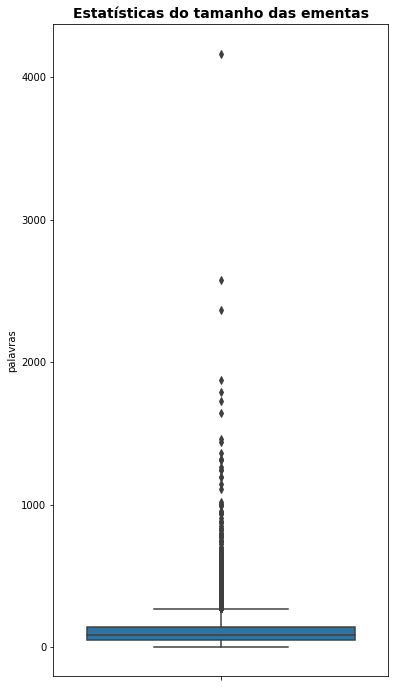

In [42]:
#Boxplot do DataFrame

fig, ax = plt.subplots(figsize=(6,12))
sns.boxplot(y=STF_df['palavras'])
plt.title('Estatísticas do tamanho das ementas', fontsize=14, fontweight='bold')
plt.show()

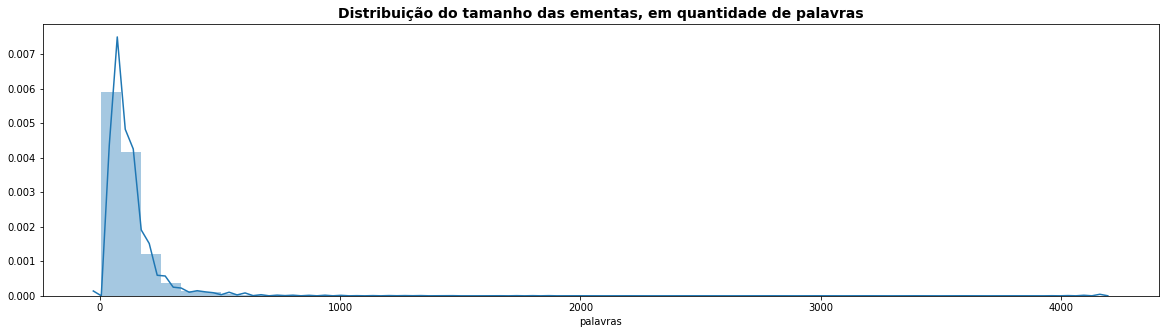

In [43]:
# Distribuição das palavras da ementa (Distplot)

fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(STF_df['palavras'])
plt.title('Distribuição do tamanho das ementas, em quantidade de palavras', fontsize=14, fontweight='bold')
plt.show()

In [44]:
STF_df['Data'].dt.year.describe()

count    11171.000000
mean      2006.052457
std         15.533385
min       1950.000000
25%       2002.000000
50%       2012.000000
75%       2016.000000
max       2020.000000
Name: Data, dtype: float64

In [45]:
STF_df['Data'].dt.year.value_counts()

2019    876
2020    830
2014    814
2016    628
2012    619
2015    617
2017    549
2013    533
2011    516
2009    467
2010    420
2018    412
2008    244
2002    223
2006    196
2007    177
2005    165
2004    147
2000    123
2001    122
1975    112
2003    109
1994    101
1999     96
1983     92
1973     89
1966     81
1997     78
1998     78
1974     77
       ... 
1971     57
1980     55
1993     54
1978     53
1977     52
1976     51
1972     47
1962     46
1967     45
1988     39
1965     38
1970     29
1959     28
1968     27
1961     26
1960     25
1969     24
1964     22
1991     20
1955     16
1957     15
1958     15
1952     15
1956     14
1990     13
1953     11
1954     10
1989      7
1950      5
1951      5
Name: Data, Length: 71, dtype: int64

In [46]:
# Segmentar anos de julgamento

def segmenta_anos(ano):
    if int(ano) >= 2010:
        res = "De 2010 a 2020"
    
    elif int(ano) >= 2000:
        res = "De 2000 a 2009"
        
    elif int(ano) >= 1990:
        res = "De 1990 a 1999"
    
    elif int(ano) >= 1980:
        res = "De 1980 a 1989"
    
    elif int(ano) >= 1970:
        res = "De 1970 a 1979"
    
    elif int(ano) >= 1960:
        res = "De 1960 a 1969"
    
    else:
        res = "De 1950 a 1959"
        
    return res

STF_df['Segmento_ano'] = STF_df['Data'].dt.year.apply(segmenta_anos)

In [47]:
STF_df['Segmento_ano'].value_counts()

De 2010 a 2020    6814
De 2000 a 2009    1973
De 1990 a 1999     646
De 1970 a 1979     642
De 1980 a 1989     568
De 1960 a 1969     394
De 1950 a 1959     134
Name: Segmento_ano, dtype: int64

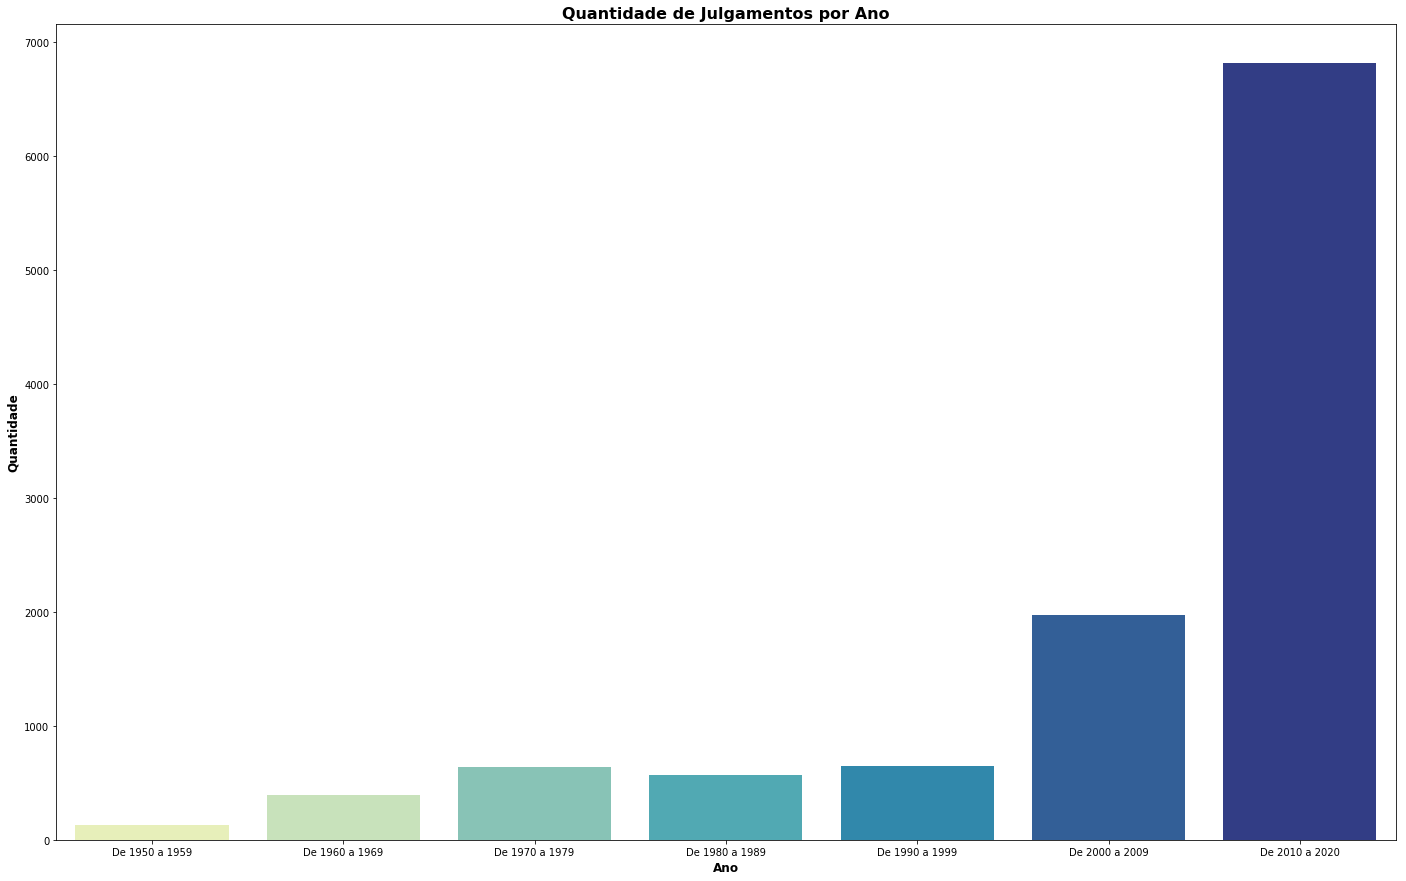

In [48]:
# Gráfico de julgamentos por ano:

fig, ax = plt.subplots(figsize = (24,15))
sns.countplot(STF_df['Segmento_ano'].sort_values(), palette='YlGnBu')
plt.title('Quantidade de Julgamentos por Ano', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Ano', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

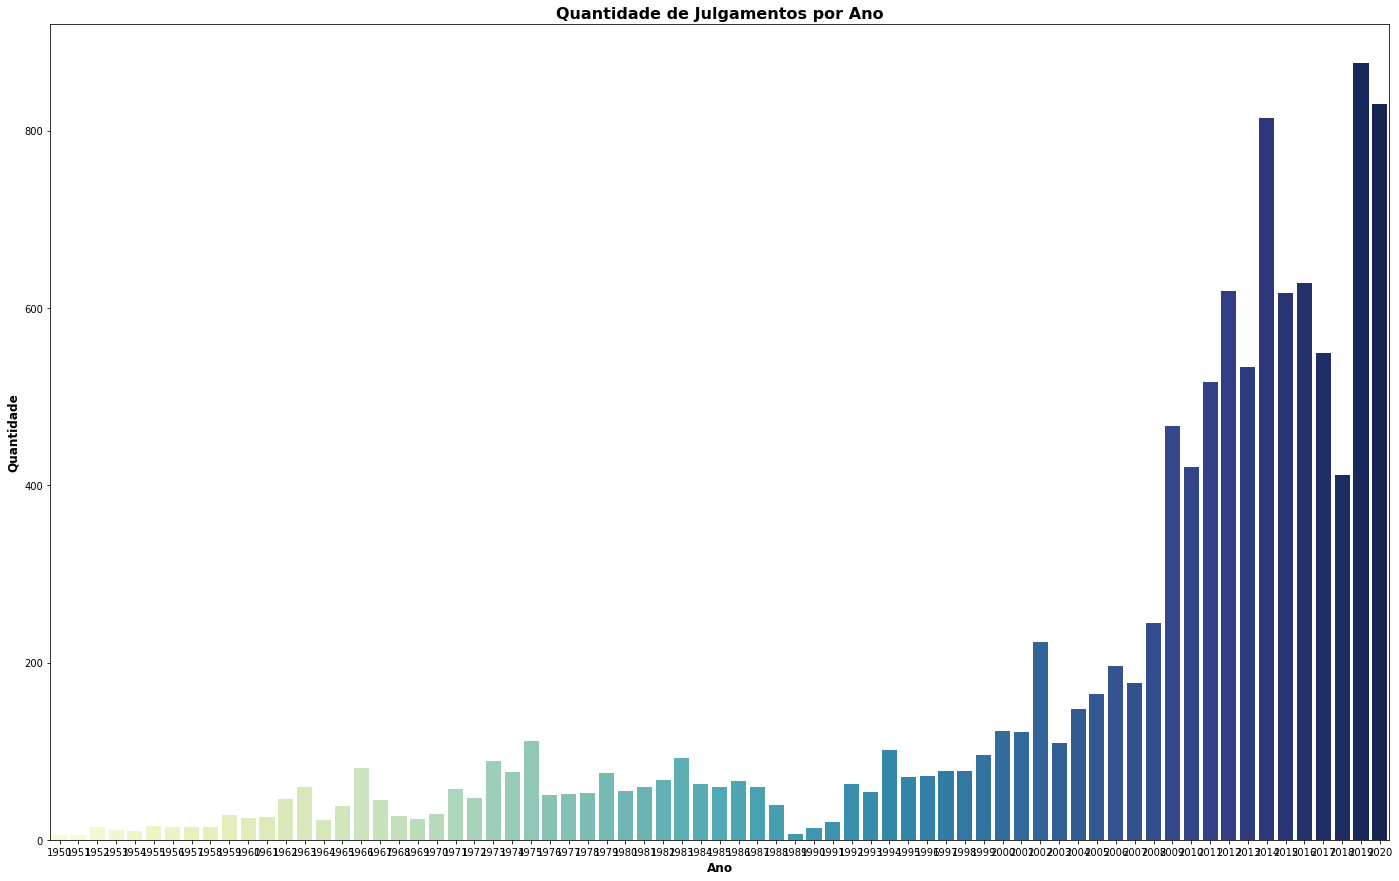

In [49]:
# Gráfico de julgamentos por ano:

fig, ax = plt.subplots(figsize = (24,15))
sns.countplot(STF_df['Data'].dt.year.sort_values(), palette='YlGnBu')
plt.title('Quantidade de Julgamentos por Ano', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Ano', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

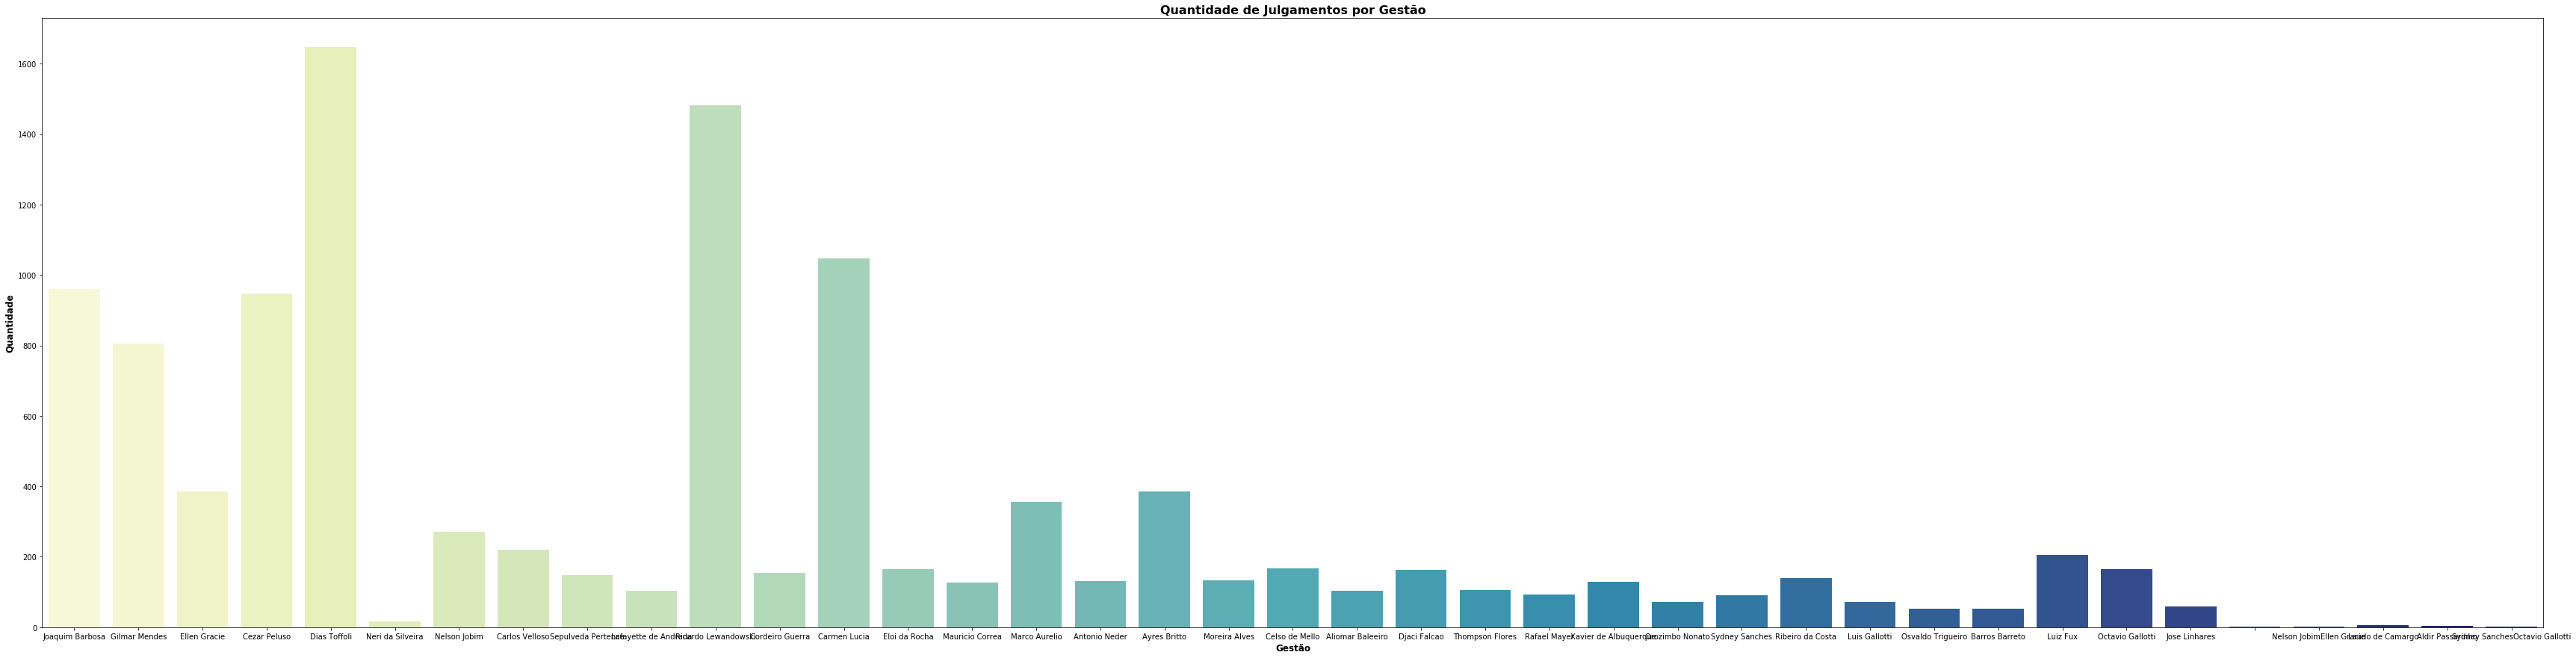

In [50]:
# Gráfico de julgamentos por ano:

fig, ax = plt.subplots(figsize = (60,15))
sns.countplot(STF_df['Presidente_STF'], palette='YlGnBu')
plt.title('Quantidade de Julgamentos por Gestão', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Gestão', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

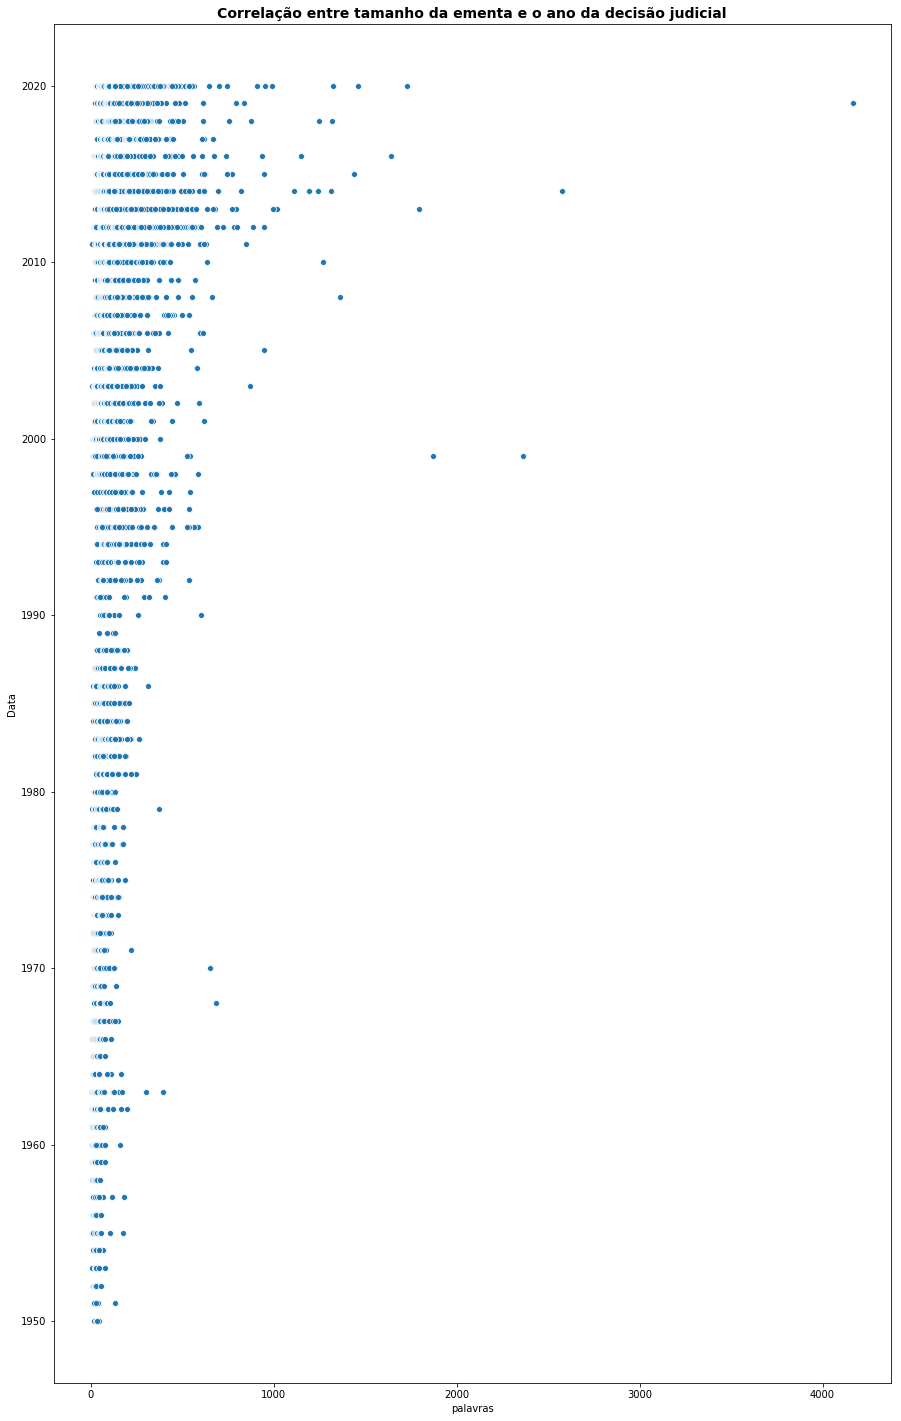

In [51]:
# Scatterplot Quantidade de palavras da ementa x ano

fig, ax = plt.subplots(figsize=(15,25))
sns.scatterplot(STF_df['palavras'], STF_df['Data'].dt.year)
plt.title('Correlação entre tamanho da ementa e o ano da decisão judicial', fontsize=14, fontweight='bold')
plt.show()

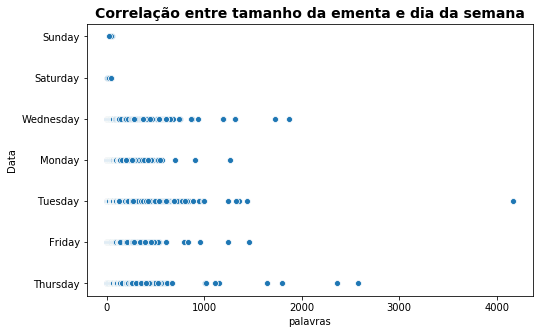

In [52]:
#Scatterplot Quantidade de palavras da ementa x dia da semana

fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(STF_df['palavras'], STF_df['Data'].dt.weekday_name)
plt.title('Correlação entre tamanho da ementa e dia da semana', fontsize=14, fontweight='bold')
plt.show()

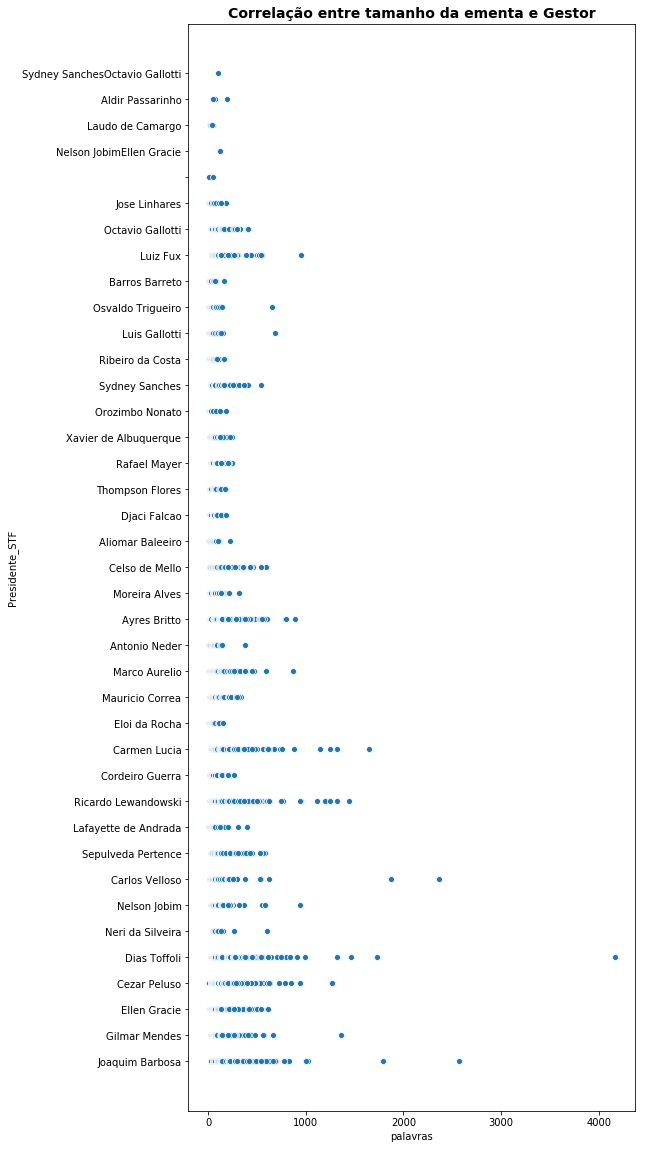

In [53]:
#Scatterplot Quantidade de palavras da ementa x dia da semana

fig, ax = plt.subplots(figsize=(8,20))
sns.scatterplot(STF_df['palavras'], STF_df['Presidente_STF'])
plt.title('Correlação entre tamanho da ementa e Gestor', fontsize=14, fontweight='bold')
plt.show()

## Criação de Modelo de Machine Learning

In [54]:
stopwords_para_tfidf = ['tributario', 'sumula', 'ristf', 'recurso', 'embargos', 'declaracao', 'agravo', 'interposto',
                        'extraordinario', 'decreto', 'decretos', 'legislacao', 'constituicao', 'regimental', 'disposto',
                        'artigo', 'artigos', 'cpc', 'precedente', 'precedentes', 'direito', 'imposto', 'tributo',
                        'impostos', 'tributos', 'provimento', 'infringentes', 'supremo', 'tribunal', 'rejeitado', 'rejeitados',
                        'contradicao', 'obscuridade', 'acolhido', 'acolhidos', 'acordao', 'sentenca', 'declaratorio', 
                        'declaratorios', 'previsto', 'prevista', 'previstos', 'previstas', 'conhecido', 'embargado',
                         'ministro', 'codigo', 'codigos', 'plenario', 'processo', 'processos', 'constitucional',
                       'infraconstitucional', 'ementa', 'federal', 'tributaria', 'decisao', 'provido', 'improvido', 
                       'acolhido', 'materia', 'geral', 'jurisprudencia', 'repercussao', 'insconstitucionalidade']

In [55]:
# Incluir stopwords na lista de stopwords_para_tfidf

stopwords_para_tfidf.extend(stopwords)

In [56]:
 stemmer = nltk.stem.RSLPStemmer() # Stemmer específico para língua portuguesa

stopwords_stem = []
for palavra in stopwords_para_tfidf:
    palavra_stem = stemmer.stem(palavra)
    stopwords_stem.append(palavra_stem)
stopwords_para_tfidf.extend(stopwords_stem)

vectorizer = TfidfVectorizer(stop_words = stopwords_para_tfidf, min_df = 2, max_features = 10000)
matriz_tfidf_ementa = vectorizer.fit_transform(STF_df['Ementa_processada'])

matriz_tfidf_ementa_df = pd.DataFrame(matriz_tfidf_ementa.toarray(), columns=vectorizer.get_feature_names())
pd.set_option('display.max_rows', 10)
matriz_tfidf_ementa_df

abala  abalar  abalo  abandono  abarca  abarcada  abarcados  abarcando  \
0        0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
1        0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
2        0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
3        0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
4        0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
...      ...     ...    ...       ...     ...       ...        ...        ...   
11166    0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
11167    0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
11168    0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
11169    0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   
11170    0.0     0.0    0.0       0.0     0.0       0.0        0.0        0.0   

       abarcar  abastecer  ...  xxxii  xxxiii  xxxiv  xxxix  xxxv  xxxvi  \
0          0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
1          0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
2          0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
3          0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
4          0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
...        ...        ...  ...    ...     ...    ...    ...   ...    ...   
11166      0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
11167      0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
11168      0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
11169      0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   
11170      0.0        0.0  ...    0.0     0.0    0.0    0.0   0.0    0.0   

       zavascki  zelar  zero  zona  
0      0.000000    0.0   0.0   0.0  
1      0.000000    0.0   0.0   0.0  
2      0.000000    0.0   0.0   0.0  
3      0.000000    0.0   0.0   0.0  
4      0.000000    0.0   0.0   0.0  
...         ...    ...   ...   ...  
11166  0.000000    0.0   0.0   0.0  
11167  0.085697    0.0   0.0   0.0  
11168  0.000000    0.0   0.0   0.0  
11169  0.000000    0.0   0.0   0.0  
11170  0.000000    0.0   0.0   0.0  

[11171 rows x 10000 columns]

In [57]:
# Redução da dimensionalidade

svd = TruncatedSVD(n_components = 100, n_iter = 7, random_state = 1)
matriz_tfidf_ementa_svd = svd.fit_transform(matriz_tfidf_ementa_df)
matriz_tfidf_ementa_svd_df = pd.DataFrame(matriz_tfidf_ementa_svd)
matriz_tfidf_ementa_svd_df

0         1         2         3         4         5         6   \
0      0.073621 -0.051762 -0.050021  0.130657 -0.028600  0.033682 -0.070336   
1      0.114381 -0.017372 -0.101254 -0.017436 -0.057047 -0.096809  0.064668   
2      0.123569 -0.022898 -0.127876 -0.032760 -0.082059 -0.028228 -0.012755   
3      0.123569 -0.022898 -0.127876 -0.032760 -0.082059 -0.028228 -0.012755   
4      0.117174 -0.022061 -0.069053  0.008339 -0.108544 -0.241995  0.006502   
...         ...       ...       ...       ...       ...       ...       ...   
11166  0.172179 -0.027271 -0.136367 -0.063070 -0.106072 -0.158033  0.151736   
11167  0.133685 -0.033318 -0.077471  0.000595 -0.102522 -0.153562 -0.012652   
11168  0.151263 -0.017372 -0.130566  0.048838 -0.118063 -0.047663  0.037906   
11169  0.119567 -0.006843 -0.108625  0.031053 -0.081233 -0.041055  0.016585   
11170  0.157399 -0.020648 -0.107305  0.020705 -0.083926 -0.049263  0.036244   

             7         8         9   ...        90        91        92  \
0      0.035090  0.064206  0.114160  ... -0.004135 -0.016092 -0.026684   
1     -0.020985  0.084356 -0.054566  ...  0.019647 -0.068024  0.012731   
2     -0.077868  0.023158 -0.016236  ...  0.031312 -0.028917  0.085764   
3     -0.077868  0.023158 -0.016236  ...  0.031312 -0.028917  0.085764   
4      0.046372  0.303789 -0.179980  ...  0.038365  0.008037  0.003618   
...         ...       ...       ...  ...       ...       ...       ...   
11166 -0.029481 -0.102478  0.064151  ... -0.048696  0.008296 -0.023267   
11167  0.017481  0.190123 -0.080218  ...  0.024872 -0.006890 -0.012336   
11168 -0.072534  0.077076 -0.001051  ... -0.020724 -0.004460  0.019875   
11169 -0.040134  0.064979  0.024872  ...  0.034849 -0.016014 -0.016472   
11170 -0.046153  0.062065  0.024335  ... -0.013930 -0.006428  0.000204   

             93        94        95        96        97        98        99  
0      0.005848  0.003117  0.003063  0.022540  0.018204  0.030058  0.023131  
1      0.016170 -0.023298 -0.031422  0.021082  0.027020  0.029794  0.019376  
2      0.060493 -0.000868 -0.015097 -0.042109  0.053291 -0.022828 -0.000334  
3      0.060493 -0.000868 -0.015097 -0.042109  0.053291 -0.022828 -0.000334  
4     -0.019643 -0.019504  0.035923 -0.026301 -0.013425 -0.013114 -0.004323  
...         ...       ...       ...       ...       ...       ...       ...  
11166  0.040701 -0.048404 -0.031848  0.037666  0.019260 -0.015291 -0.001634  
11167 -0.007685 -0.025596  0.001111 -0.000485  0.038938 -0.062463  0.018459  
11168 -0.041659 -0.029866  0.004631 -0.017283 -0.036171 -0.012005  0.019069  
11169 -0.035296 -0.054088 -0.007200  0.000044 -0.013624 -0.019726 -0.004027  
11170 -0.014635 -0.031048  0.010943 -0.008036  0.007189 -0.004424 -0.000851  

[11171 rows x 100 columns]

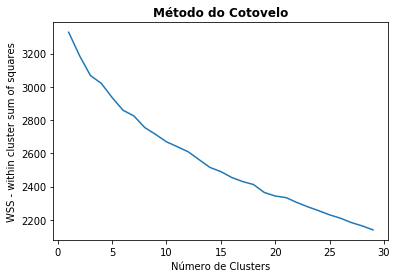

In [58]:
# https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/
#Método do Cotovelo

from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = kmeans.fit(matriz_tfidf_ementa_svd)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,30), wcss)
plt.title('Método do Cotovelo', fontweight = 'bold')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

In [59]:
from kneed import KneeLocator

k1 = KneeLocator(range(1, 30), wcss, curve='convex', direction='decreasing')
k1.elbow

14

In [60]:
from sklearn.cluster import KMeans
num_clusters = 15
kmeans = KMeans(n_clusters = num_clusters, random_state = 0)
kmeans = kmeans.fit(matriz_tfidf_ementa_svd)
centroides = kmeans.cluster_centers_
labels = kmeans.labels_
STF_df['Cluster'] = kmeans.fit_predict(matriz_tfidf_ementa_svd)

In [61]:
STF_df['Cluster']

0        0
1        6
2        6
3        6
4        1
        ..
11166    7
11167    1
11168    6
11169    6
11170    6
Name: Cluster, Length: 11171, dtype: int32

In [62]:
pd.set_option('display.max_rows', 20)
STF_df['Cluster'].value_counts()

6     4729
5     1694
0      896
3      875
13     481
7      431
1      411
14     389
2      239
9      235
10     227
11     184
12     158
8      122
4      100
Name: Cluster, dtype: int64

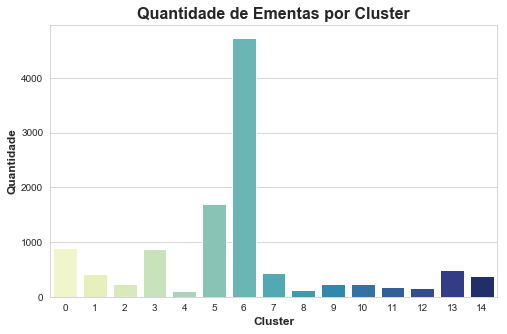

In [63]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(STF_df['Cluster'], palette = 'YlGnBu')
plt.title('Quantidade de Ementas por Cluster', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Cluster', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

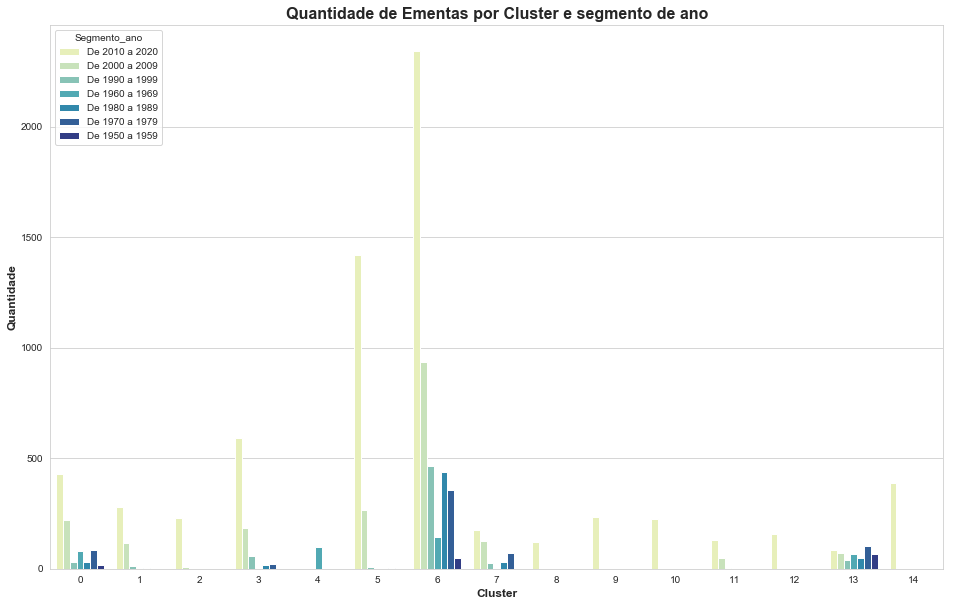

In [64]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(STF_df['Cluster'], hue=STF_df['Segmento_ano'], palette = 'YlGnBu')
plt.title('Quantidade de Ementas por Cluster e segmento de ano', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Cluster', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

Cluster 0:


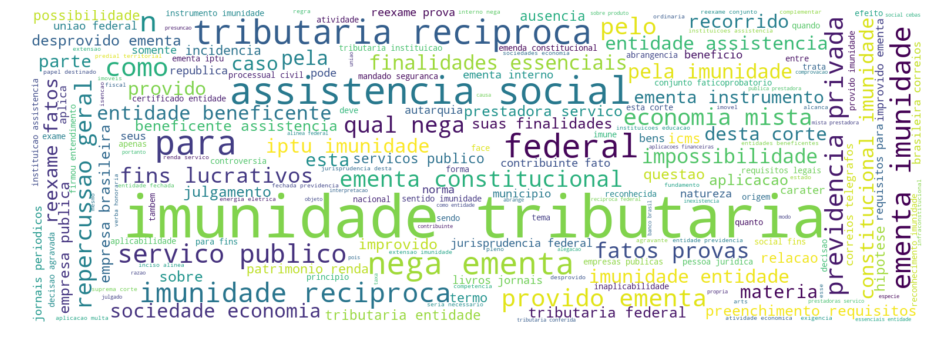

Cluster 1:


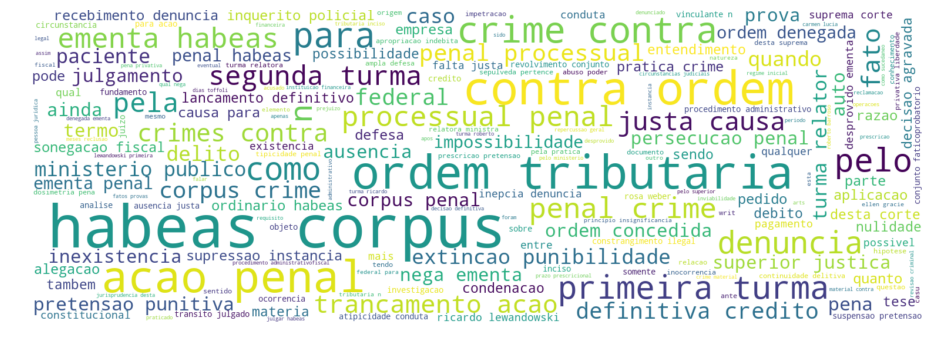

Cluster 2:


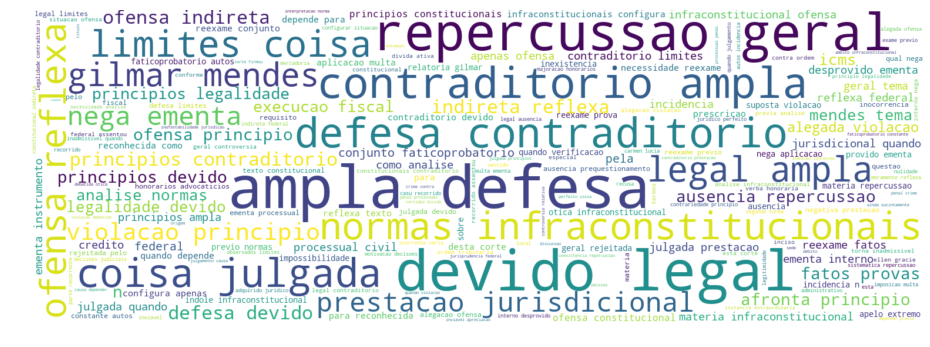

Cluster 3:


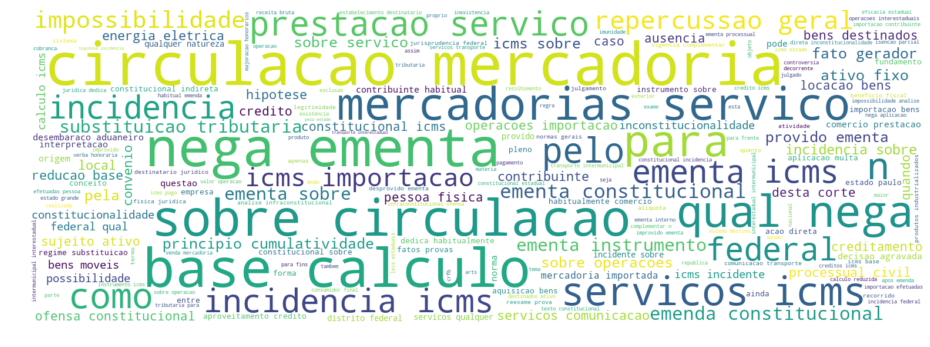

Cluster 4:


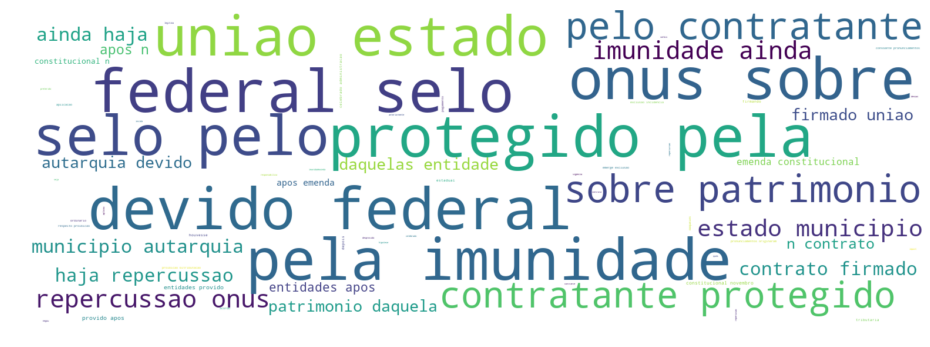

Cluster 5:


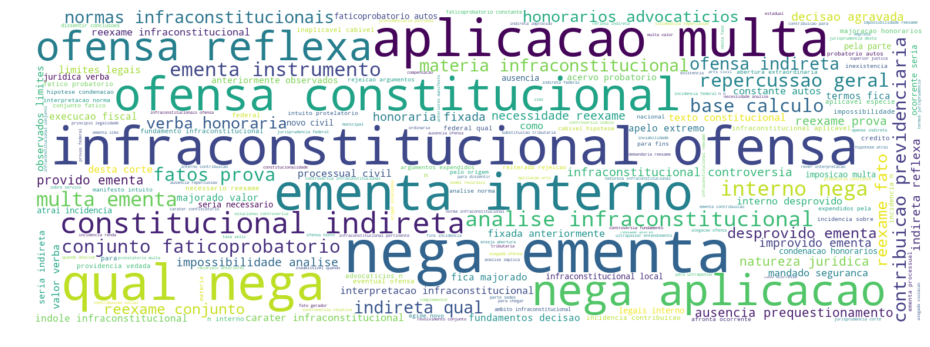

Cluster 6:


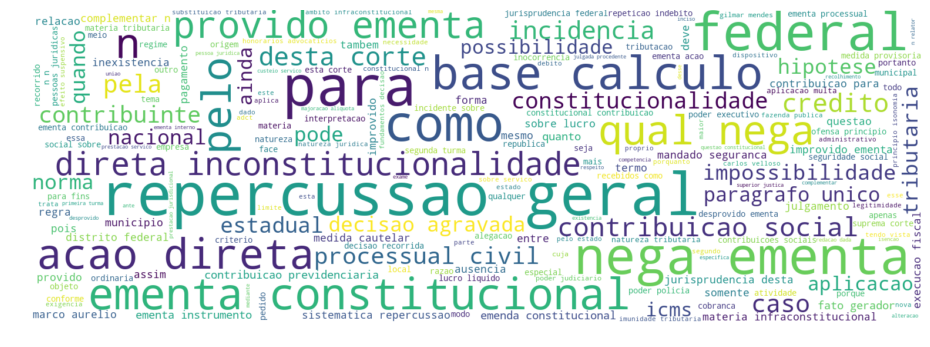

Cluster 7:


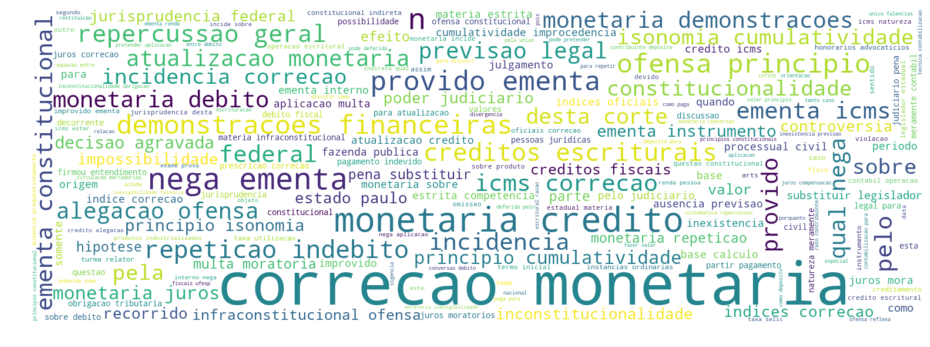

Cluster 8:


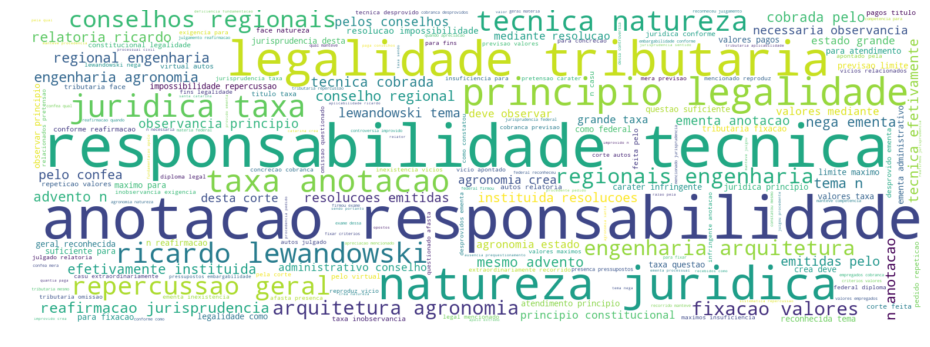

Cluster 9:


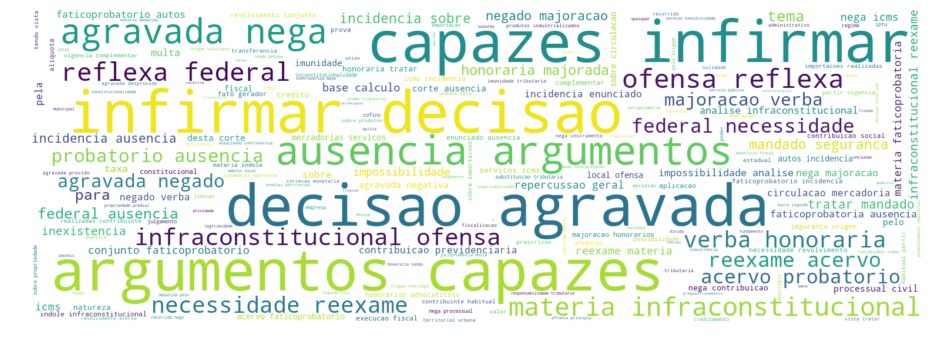

Cluster 10:


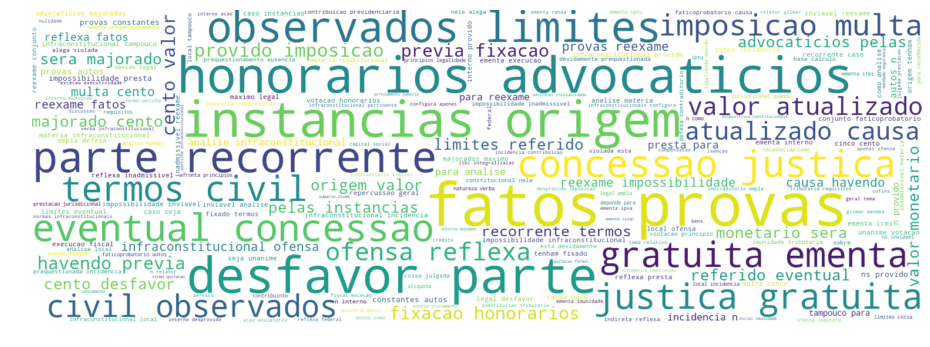

Cluster 11:


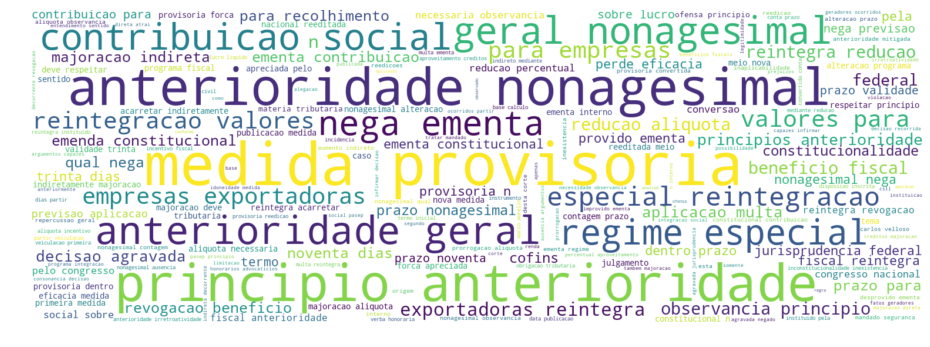

Cluster 12:


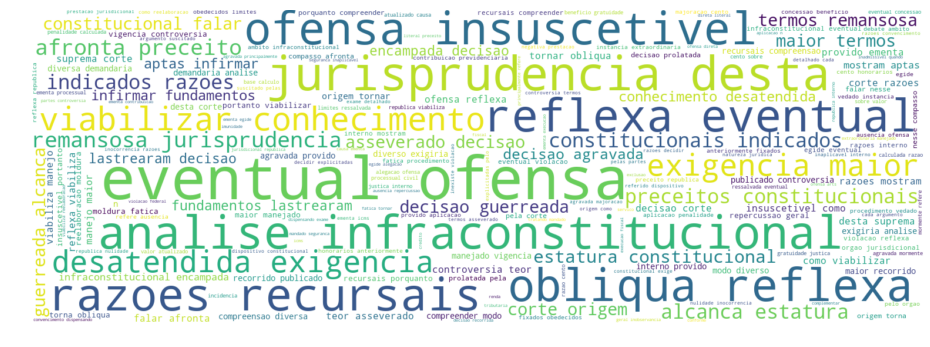

Cluster 13:


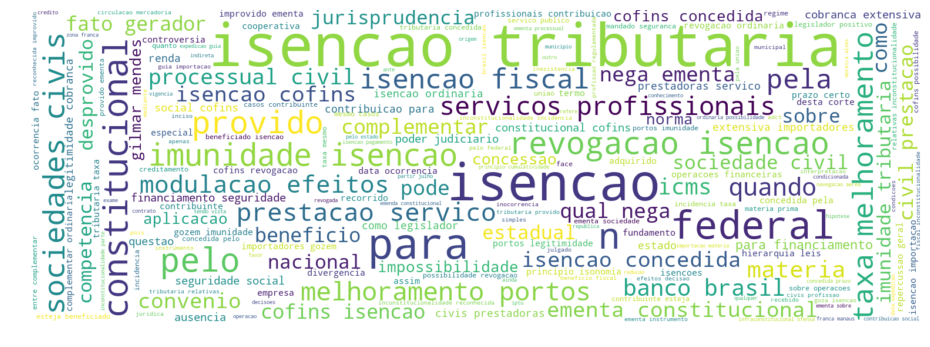

Cluster 14:


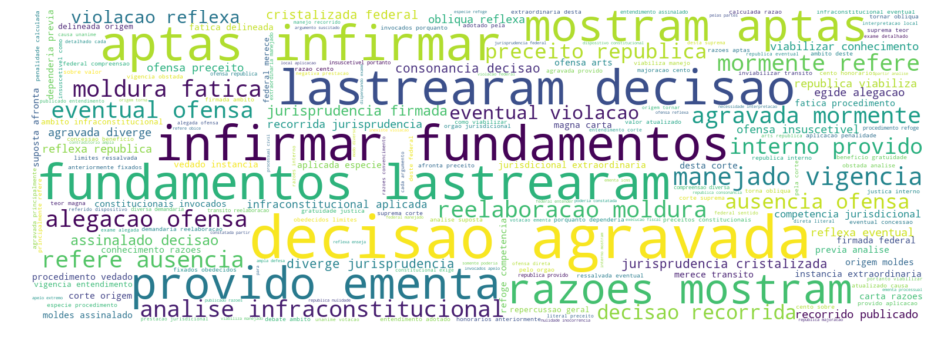

In [65]:
result = {'cluster': labels, 'ementa': STF_df['Ementa_processada']}
result = pd.DataFrame(result)
for i in range(0, num_clusters):
    s = result[result['cluster'] == i]
    text = s['ementa'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=100, width=1520, height=535, colormap='viridis', background_color='white')
    wordcloud.generate(text)
    print('Cluster {}:'.format(i))
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
      